<a href="https://colab.research.google.com/github/roaa-qteishat/Game/blob/main/Games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import the library**

In [2]:
from google.colab import files
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

Read the data set from this link
link:
https://www.kaggle.com/jyunyolin/mobile-game-retention-analysis-a-b-testing/data

In [3]:
uploaded = files.upload()
df = pd.read_csv("cookie_cats.csv")

Saving cookie_cats.csv to cookie_cats.csv


In [4]:
# See the info of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


userid: A unique number that identifies each player.

sum_gamerounds :The number of game rounds played by the player during the first 14 days after install.

In [5]:
df['sum_gamerounds'].describe()

count    90189.000000
mean        51.872457
std        195.050858
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max      49854.000000
Name: sum_gamerounds, dtype: float64

57702    49854
7912      2961
29417     2640
43671     2438
48188     2294
46344     2251
87007     2156
36933     2124
88328     2063
6536      2015
Name: sum_gamerounds, dtype: int64


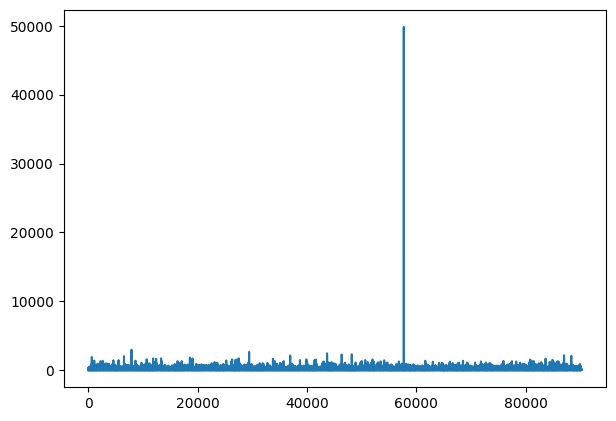

In [6]:
plt.plot(df['sum_gamerounds'])
print(df['sum_gamerounds'].nlargest(10))

count    90188.000000
mean        51.320253
std        102.682719
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max       2961.000000
Name: sum_gamerounds, dtype: float64

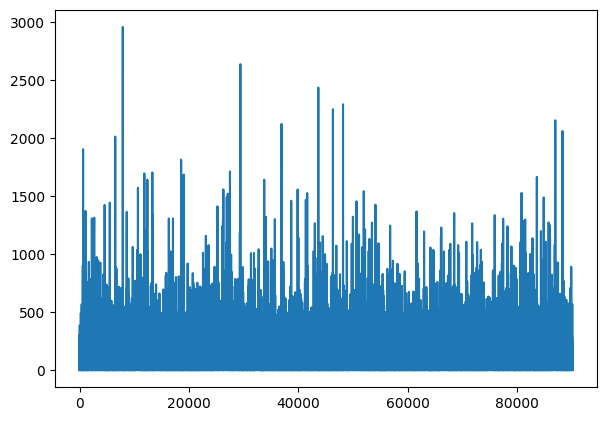

In [7]:
df = df[df['sum_gamerounds'] < df['sum_gamerounds'].max()]
plt.plot(df['sum_gamerounds'])
df['sum_gamerounds'].describe()

In [9]:
def ecdf(data):
    """Generate the ecdf data points from data"""
    
    # Get the length of the data
    n = len(data)
    # Sort the data point: x
    x = np.sort(data)
    # Generate an array of evenly divided points between 0 and 1
    y = np.arange(1, n+1) / n
    
    return x, y



Text(500, 0.9, '(500, 0.99)')

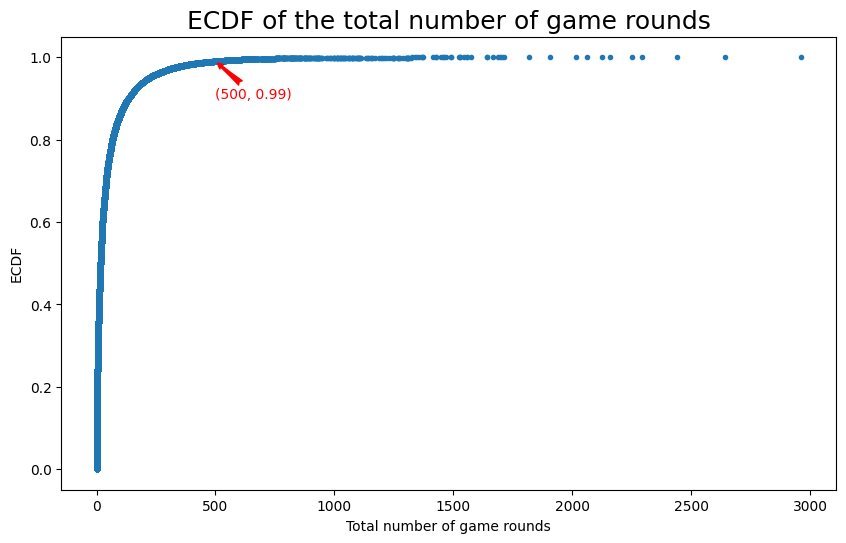

In [10]:
# Generate the ecdf data points for plotting
rounds = df['sum_gamerounds']
x, y = ecdf(rounds)

# plot the ecdf
plt.figure(figsize=(10, 6))
_ = plt.plot(x, y, marker='.', linestyle='none')

# label the graph
xlabel = 'Total number of game rounds'
ylabel = 'ECDF'
title = 'ECDF of the total number of game rounds'
_ = plt.xlabel(xlabel)
_ = plt.ylabel(ylabel)
_ = plt.title(title, size=18)

# Annotate a data point for explanation
plt.annotate('(500, 0.99)', xy=(500, 0.99), xytext=(500, 0.9),color='r' ,arrowprops={'arrowstyle':'fancy', 'color':'r'})


In [11]:
rounds_to_see = [0, 3, 5, 10, 20, 29, 30, 39, 40, 70, 100, 500]
prob_list = []
for game_round in rounds_to_see:
    prob_list.append(round(y[(x <= game_round).sum() - 1] * 100 , 2))

rounds_df = pd.DataFrame(prob_list, index=rounds_to_see, columns=['Percentage'])
print(rounds_df)

     Percentage
0          4.43
3         20.06
5         27.41
10        39.90
20        55.22
29        63.11
30        63.82
39        69.63
40        70.19
70        80.87
100       86.27
500       99.05


In [12]:
rounds_diff = rounds_df - rounds_df.shift(1).fillna(0)
rounds_diff['Percentage'] = rounds_diff['Percentage'].map(lambda x: round(x, 2))
print(rounds_diff)

     Percentage
0          4.43
3         15.63
5          7.35
10        12.49
20        15.32
29         7.89
30         0.71
39         5.81
40         0.56
70        10.68
100        5.40
500       12.78


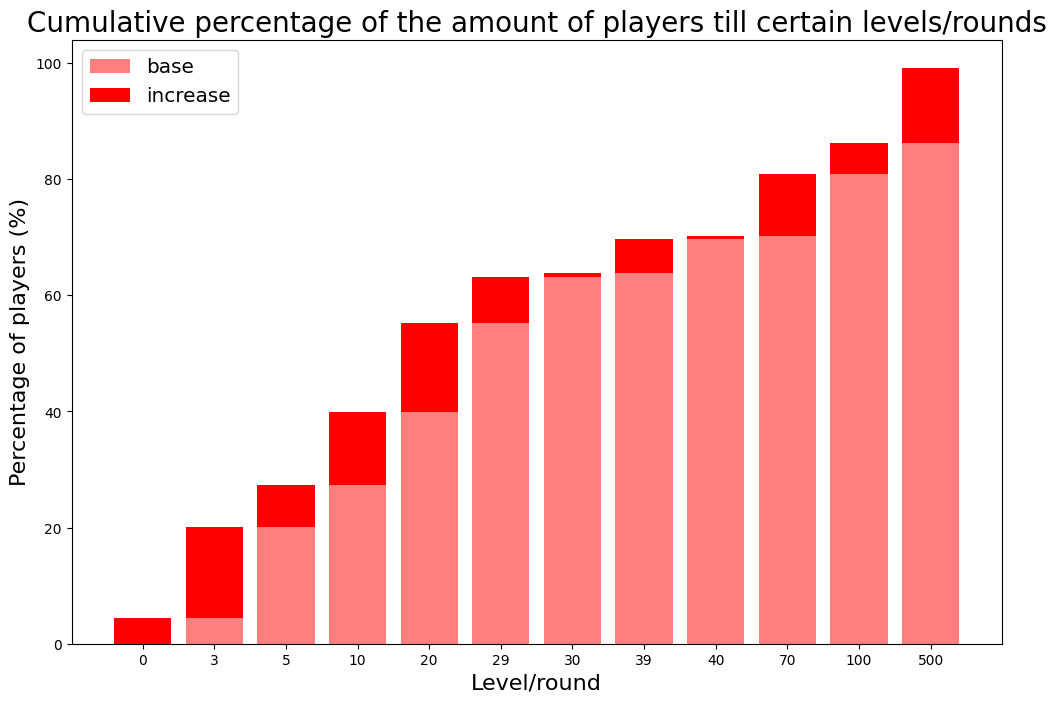

In [13]:
# Create subplots for plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Get labels for bar charts 
labels = list(rounds_df.index.map(str))
base = rounds_df.shift(1).fillna(0)['Percentage'].values
increase = rounds_diff['Percentage'].values
# Plot the stacked bar chart
ax.bar(labels, base , label='base', color='r', alpha=0.5)
ax.bar(labels, increase, bottom=base, label='increase', color='r')

# Label the chart
ax.set_title('Cumulative percentage of the amount of players till certain levels/rounds', size= 20)
ax.set_xlabel('Level/round', size=16)
ax.set_ylabel('Percentage of players (%)', size=16)
ax.legend(fontsize='x-large')

Text(35, 0.75, 'gate_30 surpasses gate_40')

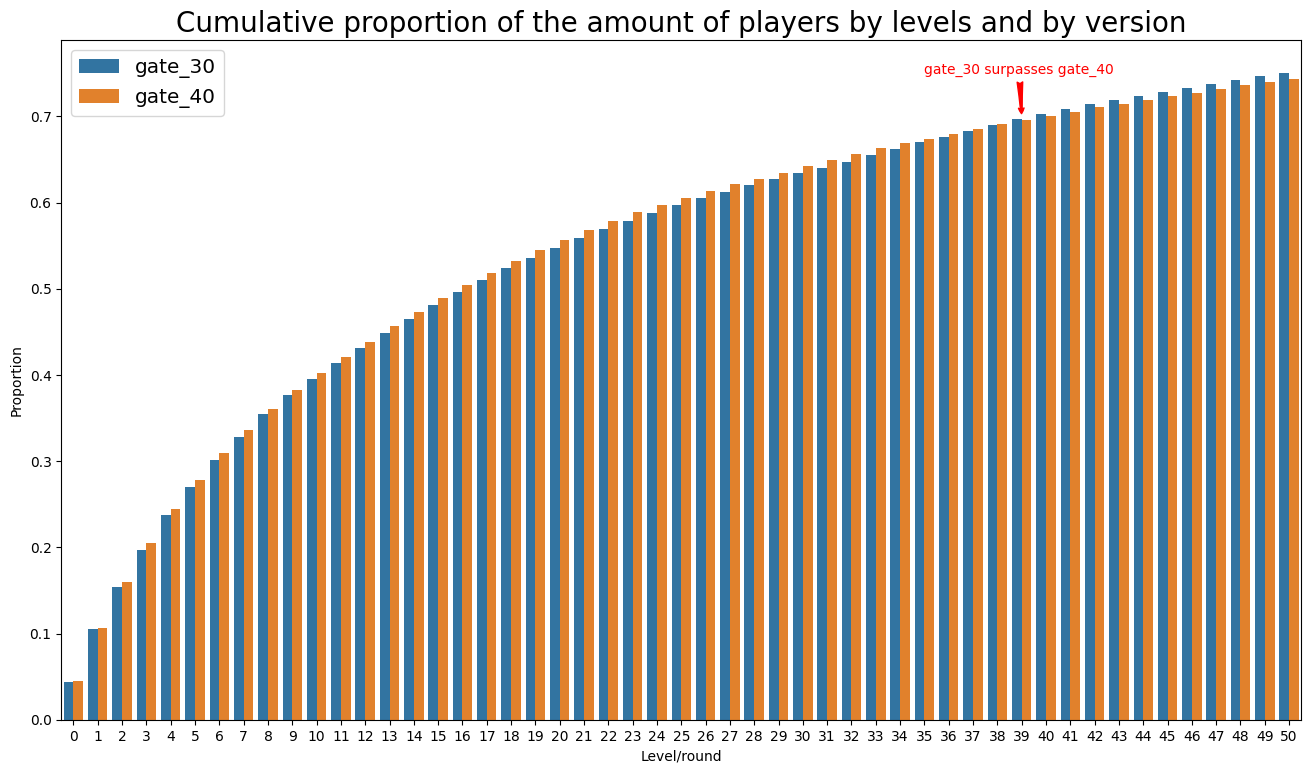

In [14]:
# Generate a round counts frequency table by version
rounds_by_ver = df.groupby('version')['sum_gamerounds'].value_counts(normalize=True, sort=False)

# Calculate cumulative sum for each version
rounds_by_ver = rounds_by_ver.groupby(level=0).cumsum()

# Filter out levels later than 30 for the "gate_30" version and later than 40 for the other version
rounds_by_ver = rounds_by_ver.reset_index(name='proportion')
rounds_by_ver = rounds_by_ver.query('(version=="gate_30" & sum_gamerounds<=50) | (version=="gate_40" & sum_gamerounds<=50)')

# Plot a side-by-side bar chart
plt.figure(figsize=(16, 9))
sns.barplot(data=rounds_by_ver, x='sum_gamerounds', y='proportion', hue='version')

# Label the chart
plt.xlabel('Level/round')
plt.ylabel('Proportion')
plt.title('Cumulative proportion of the amount of players by levels and by version', size= 20)
plt.legend(fontsize='x-large')

# Annotate an interesting bar
plt.annotate('gate_30 surpasses gate_40', 
             xy=(39, 0.7), 
             xytext=(35, 0.75), 
             color='r', 
             arrowprops={'arrowstyle':'fancy', 'color':'r'})

In [16]:
df.groupby(['version'])['retention_1', 'retention_7'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,retention_1,retention_7
version,,
gate_30,0.448198,0.190183
gate_40,0.442283,0.182000


In [17]:
pd.DataFrame(df.groupby(['retention_1', 'retention_7'])['userid'].count()/ len(df))

userid
retention_1 retention_7          
False       False        0.514891
            True         0.039894
True        False        0.299053
            True         0.146161

In [18]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two datasets"""
    
    # Concatenate the datasets: data
    data = np.concatenate((data1, data2))
    
    # Permute the data: permuted_data
    permuated_data = np.random.permutation(data)
    
    # Split the permuted_data into two: perm_sample_1 and perm_sample_2
    perm_sample_1 = permuated_data[:len(data1)]
    perm_sample_2 = permuated_data[len(data1):]
    
    return perm_sample_1, perm_sample_2

In [19]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [20]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

In [21]:
# Get both the retention data of "gate_30" and "gate_40"
gate30 = df[df['version']=='gate_30']['retention_1']
gate40 = df[df['version']=='gate_40']['retention_1']

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(gate30, gate40)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(gate30, gate40,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.0377


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.01, 15, 'p-value')

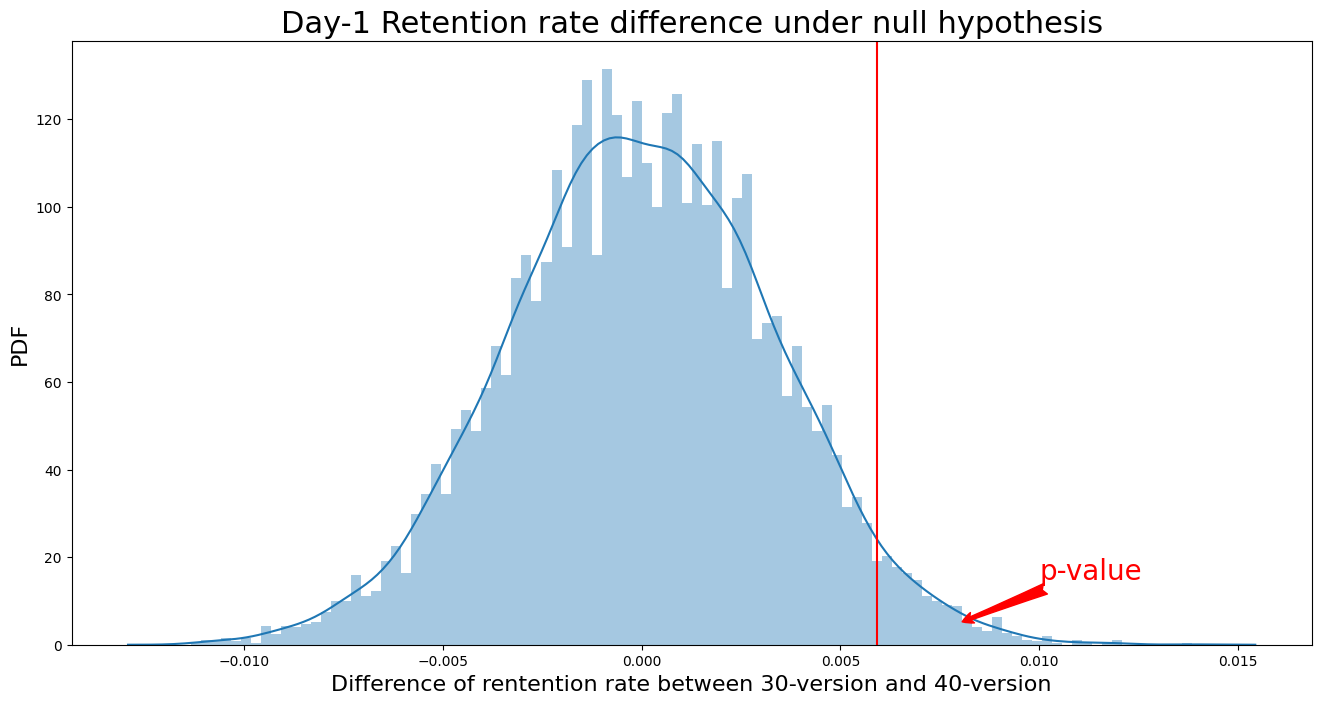

In [24]:
# Visualize the simulation result
plt.figure(figsize=(16, 8))
sns.distplot(perm_replicates, norm_hist=True, bins=100)

# Label the chart
plt.xlabel('Difference of rentention rate between 30-version and 40-version', size=16)
plt.ylabel('PDF', size=16)
plt.title('Day-1 Retention rate difference under null hypothesis', size=22)
plt.axvline(x=empirical_diff_means, color='r')
plt.annotate('p-value', 
             xy=(0.008, 5), 
             xytext=(0.010, 15), 
             color='r', 
             size=20,
             arrowprops={'arrowstyle':'fancy', 'color':'r'})

In [25]:
# Get both the retention data of "gate_30" and "gate_40"
gate30 = df[df['version']=='gate_30']['retention_7']
gate40 = df[df['version']=='gate_40']['retention_7']

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(gate30, gate40)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(gate30, gate40,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.0012


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.009, 15, 'p-value')

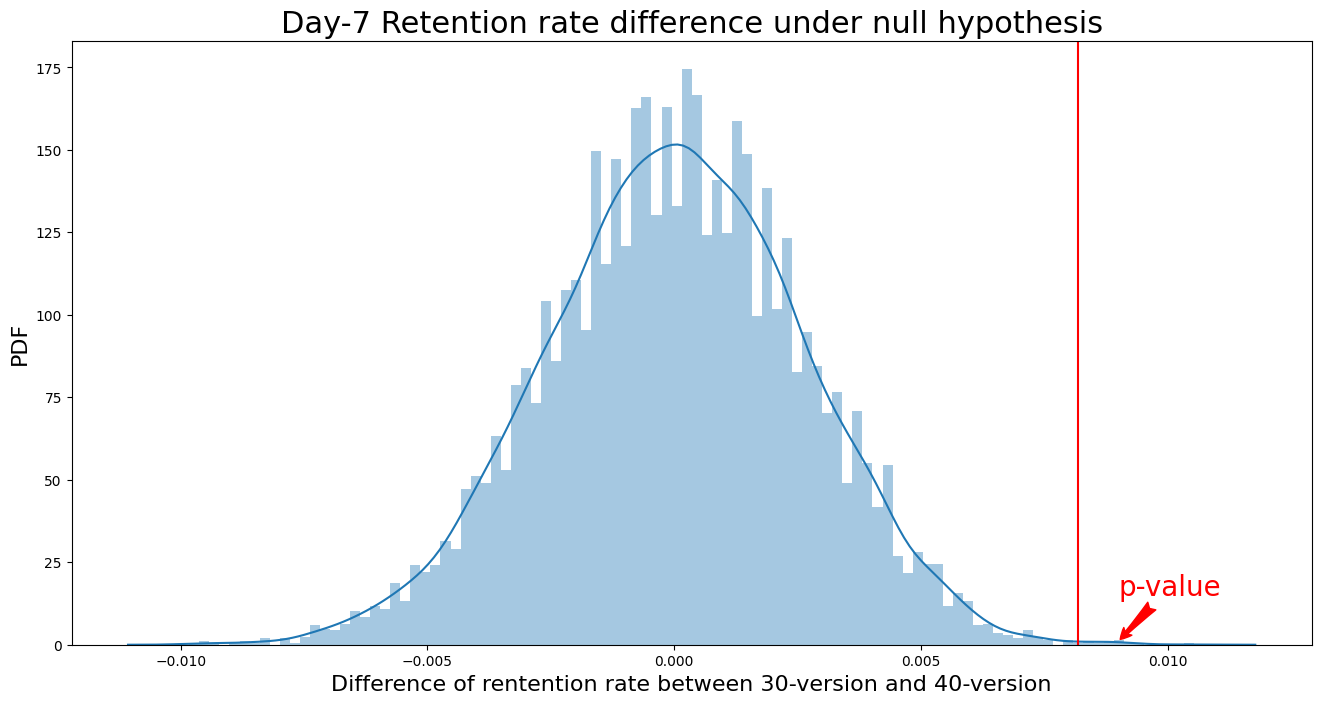

In [26]:
# Visualize the simulation result
plt.figure(figsize=(16, 8))
sns.distplot(perm_replicates, norm_hist=True, bins=100)

# Label the chart
plt.xlabel('Difference of rentention rate between 30-version and 40-version', size=16)
plt.ylabel('PDF', size=16)
plt.title('Day-7 Retention rate difference under null hypothesis', size=22)
plt.axvline(x=empirical_diff_means, color='r')
plt.annotate('p-value', 
             xy=(0.009, 1), 
             xytext=(0.009, 15), 
             color='r', 
             size=20,
             arrowprops={'arrowstyle':'fancy', 'color':'r'})